In [1]:
import numpy as np
import os

from plotting_support import explode_volume

%matplotlib inline
import matplotlib.pyplot as plt

# SNAPS

In [2]:
snap_path = '../../SOFI-modelling/HomogeneousExample/outputs/snap'
p_wave_file = os.path.join(snap_path,'test.bin.vz')
s_wave_file = os.path.join(snap_path,'test.bin.curl')

In [3]:
p_snaps_1d = np.fromfile(p_wave_file,dtype='<f')
print(p_snaps_1d.shape)

(2502000000,)


In [4]:
nx = ny = nz = 100
nsnaps = int(p_snaps_1d.shape[0]/(nx*ny*nz))

nsnaps

2502

In [5]:
np.fromfile(p_wave_file,dtype='<f').max()

1.8134998e-06

In [6]:
p_snaps = np.fromfile(p_wave_file,dtype='<f').reshape([nsnaps, nx, nz, ny])
# p_snaps = np.transpose(p_snaps,[3,0,1,2])
p_snaps.shape

(2502, 100, 100, 100)

(<Figure size 800x800 with 3 Axes>,
 (<Axes: xlabel='x samples', ylabel='t samples'>,
  <Axes: xlabel='y samples'>,
  <Axes: ylabel='y samples'>))

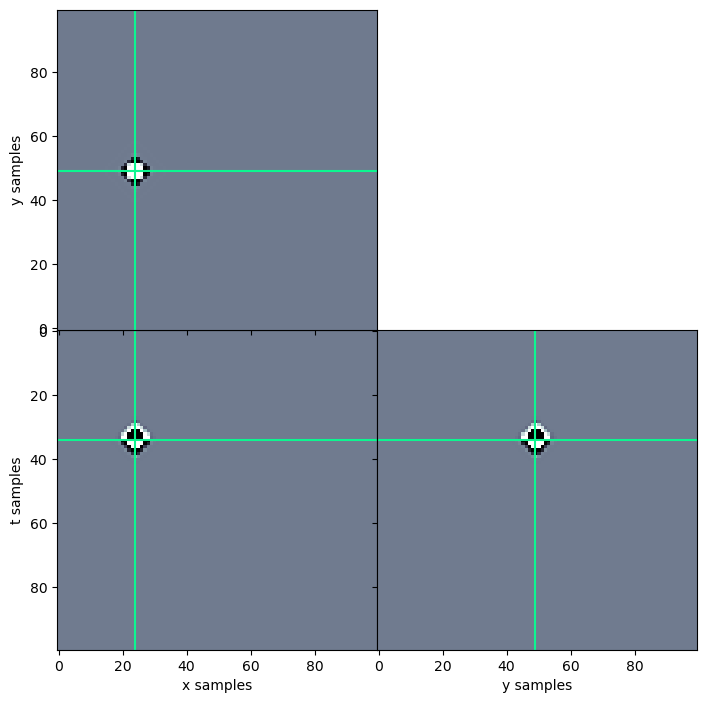

In [7]:
explode_volume(p_snaps[2], clipval=(-1e-16, 1e-16),
               x=24, y=49, t=34)
#                tlim=[0, t[-1]], tlabel=r'$t$',
#                    xlim=[x[0]/1e3, x[-1]/1e3], xlabel=r'$x_r$',
#                    ylim=[y[0]/1e3, y[-1]/1e3], ylabel=r'$y_r$',
#                    labels= ('[s]', '[km]', '[km]'),
#                    clipval=(-0.5, 0.5), figsize=(8, 8), 
#                    title='Data')

IndexError: index 20 is out of bounds for axis 0 with size 20

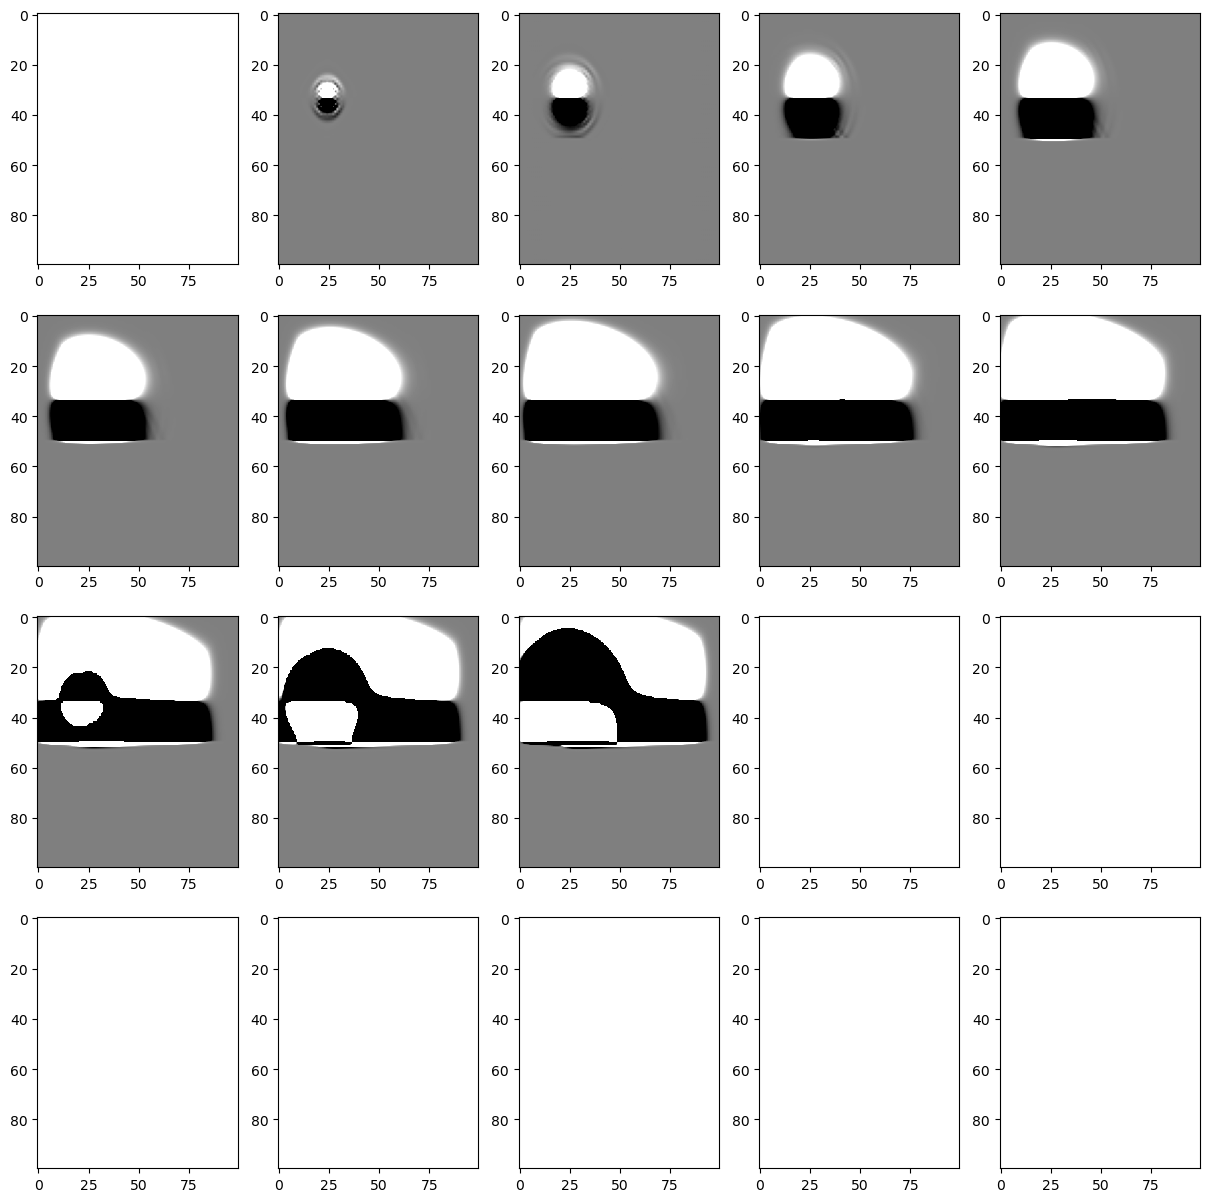

In [8]:
fig,axs = plt.subplots(4,5, figsize=[15,15])
for i,snap in enumerate(p_snaps[::10]):
    axs.ravel()[i].imshow(snap[:,:,49], aspect='auto', cmap='binary', vmin=-1e-14, vmax=1e-14)
for ax in axs.ravel(): ax.set_yticks([]); ax.set_xticks([])

# DATA

In [ ]:
import segyio

In [ ]:
data_path = '../../SOFI-modelling/HomogeneousExample/outputs/su'
vz_path = os.path.join(data_path,'test_vz.su')
# s_wave_file = os.path.join(data_path,'test.bin.curl')

In [ ]:
with segyio.open(vz_path, "r", endian = 'little', ignore_geometry=True) as f:
    print(f.trace[0])